In [9]:
# importing tool functions
import numpy as np
import matplotlib.pyplot as plt
from tools import utils, ml_tools
import pandas as pd
import numpy as np

# machine learning imports
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.preprocessing import LabelBinarizer

# graphing tools
import seaborn as sns
from scipy.stats import sem

dir_name_e = r'C:\Users\EfiaA\OneDrive - Imperial College London\Imperial academic work\University life\Y4\MSci project\Project_Coding\nlp-physicseducation\Pickledfiles'

AttributeError: module 'matplotlib.cbook' has no attribute 'deprecated'

In [4]:
# import the yr1c1c1 labels
dir_csv = 'outputs/labels_cleaned_y1c1c2.csv'
df = pd.read_csv(dir_csv, encoding='utf-8')

In [5]:
# -- Bag of Words ---
wordvec_names, wordvec_counts= ml_tools.BoW(df['Content'].tolist())
y_b = df['ReasoningLevel'].tolist()

# -- Feature extraction: TF-IDF ---
X_t = np.array(ml_tools.tf_idf(df['Content'].tolist()))
X_t = X_t[1]
y_t = df['ReasoningLevel'].tolist()


# coding the labels so easily interpretable by the computer
lb = LabelBinarizer()
lb.fit(y_b)
y_b = lb.transform(y_b)



<ipython-input-5-bdc7c1b21b59>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_t = np.array(ml_tools.tf_idf(df['Content'].tolist()))


In [6]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_t, y_t , train_size = 0.8)

In [8]:
# --- splitting bow data -----
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(wordvec_counts, y_b , train_size = 0.5)
input = X_train_b.shape[1] # input for NN


In [9]:
#----- first neural netork, experiment ----- 

maxlen = 100 
model = Sequential()
model.add(layers.Dense(10, input_dim = input, activation  = 'relu'))
model.add(layers.Dense(6,activation = 'sigmoid'))
model.add(layers.Flatten())
model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])
model.build(input)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                47160     
                                                                 
 dense_2 (Dense)             (None, 6)                 66        
                                                                 
 flatten (Flatten)           (None, 6)                 0         
                                                                 
Total params: 47,226
Trainable params: 47,226
Non-trainable params: 0
_________________________________________________________________


In [11]:
#---- Neural network function -----
def NN(model1, input1, ephs, X_t, y_t, X_test, y_test):
    maxlen = 100 
    model = model1
    model.add(layers.Dense(10, input_dim = input, activation  = 'relu'))
    model.add(layers.Dense(1,activation = 'sigmoid'))
    model.add(layers.Flatten())
    model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])
    model.build(input1)
    model.summary()
    history = model.fit(X_t,y_t,epochs = ephs, verbose=True, validation_data=(X_test, y_test), batch_size=30 )
    loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
    return history


nn1 = NN(Sequential(), input, 1000, X_train_b, y_train_b, X_test_b, y_test_b)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                47160     
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
 flatten_1 (Flatten)         (None, 1)                 0         
                                                                 
Total params: 47,171
Trainable params: 47,171
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
2/2 [==============================] - 1s 312ms/step - loss: 1.1736 - accuracy: 0.7287 - val_loss: 1.3526 - val_accuracy: 0.4479
Epoch 2/1000
2/2 [==============================] - 0s 37ms/step - loss: 0.9546 - accuracy: 0.4947 - val_loss: 0.8354 - val_accuracy: 0.6875
Epoch 3/1000
2/2 [=============

In [27]:
# ---- print nn1 - gives an array of 2500 accuracy values 
#print(nn1.history['accuracy'])

In [28]:
# --- getting the accuracy values ----
acc = nn1.history['accuracy']

# --- put in a pandas dataframe  ----
accu_val  = pd.DataFrame(acc, columns= ['accuracy'])

# --- mean and standard error mean values (sem) ---
mean_val_acc= sum(acc)/len(acc)
sem_val     = sem(acc)

In [30]:
# ---- FE and ML labels used ----
labels = ['ArgumentLevel','ReasoningLevel'] # 'ArgumentLevel', 'ReasoningLevel'
labels2 = ['ArgumentLevel','ReasoningLevel','ArgumentLevel','ReasoningLevel'] # 'ArgumentLevel', 'ReasoningLevel'
features = ['ifidf','bow'] #'bow', 'ifidf'
num_epochs = 2500
train_sizes = [0.5,0.6,0.7,0.8,0.9] 



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                47160     
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
 flatten_4 (Flatten)         (None, 1)                 0         
                                                                 
Total params: 47,171
Trainable params: 47,171
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
2/2 [==============================] - 1s 283ms/step - loss: 0.8228 - accuracy: 0.6330 - val_loss: 0.8616 - val_accuracy: 0.7396
Epoch 2/1000
2/2 [==============================] - 0s 104ms/step - loss: 0.7189 - accuracy: 0.7394 - val_loss: 0.7213 - val_accuracy: 0.6042
Epoch 3/1000
2/2 [============

No handles with labels found to put in legend.


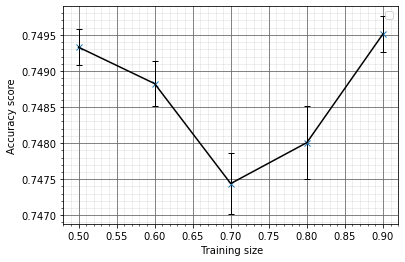

In [32]:
#----- bow, RL ------
accuracies = []
accuracies_sem = []
dummy = []
for i in train_sizes:
    X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(wordvec_counts, y_b , train_size = i)
    input = X_train_b.shape[1]
    nn1 = NN(Sequential(), input, 1000, X_train_b, y_train_b, X_test_b, y_test_b)
    dummy.append(nn1.history['accuracy'])

for array in dummy:
    accuracies.append(np.sum(array)/len(array))
    accuracies_sem.append(sem(array))

dict_rl = {'trainsize':train_sizes, 'accuracy':accuracies, 'sem': accuracies_sem}
acc_rl_bow = pd.DataFrame(dict_rl)
utils.save_as_pickle_file(acc_rl_bow,'NN_bow_rl_trainsize_accuracy_sem_1000ephs', dir_name_e)
unpickled_rl_bow_df = utils.load_pickle_file_to_df('NN_bow_rl_trainsize_accuracy_sem_1000ephs',dir_name_e)

In [6]:

#----- bow, RL, plotting ------
plt.plot(unpickled_rl_bow_df['trainsize'], unpickled_rl_bow_df['accuracy'], 'o')
plt.errorbar(unpickled_rl_bow_df['trainsize'], unpickled_rl_bow_df['accuracy'], yerr = unpickled_rl_bow_df['sem'], markersize=0.5, capsize=3, elinewidth=1, color= 'black' )
plt.xlabel(' Training size')
plt.ylabel('Accuracy score')


# save figure 
# filepath = 'outputs/NN-RL-BOW-1000ephs_NEW'
# plt.savefig(filepath)

AttributeError: module 'matplotlib.cbook' has no attribute 'deprecated'

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 10)                47160     
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
 flatten_9 (Flatten)         (None, 1)                 0         
                                                                 
Total params: 47,171
Trainable params: 47,171
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
2/2 [==============================] - 2s 245ms/step - loss: 7.2175 - accuracy: 0.2500 - val_loss: 4.3584 - val_accuracy: 0.2500
Epoch 2/1000
2/2 [==============================] - 0s 45ms/step - loss: 3.6462 - accuracy: 0.2606 - val_loss: 0.9337 - val_accuracy: 0.4896
Epoch 3/1000
2/2 [============

Text(0, 0.5, 'Accuracy score')

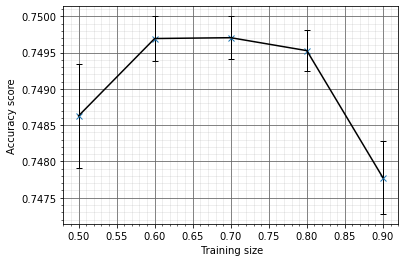

In [46]:
# -- Bag of Words --- Argument level
wordvec_names_a, wordvec_counts_a= ml_tools.BoW(df['Content'].tolist())
y_b_al = df['ArgumentLevel'].tolist()

# coding the labels so easily interpretable by the computer
lb = LabelBinarizer()
lb.fit(y_b_al)
y_b_al= lb.transform(y_b_al)

#----- bow, AL, iterations --------
accuracies_al = []
accuracies_sem_al = []
dummy = []
for i in train_sizes:
    X_train_b2, X_test_b2, y_train_b2, y_test_b2= train_test_split(wordvec_counts, y_b , train_size = i)
    input = X_train_b.shape[1]
    nn1 = NN(Sequential(), input, 1000, X_train_b2, y_train_b2, X_test_b2, y_test_b2)
    dummy.append(nn1.history['accuracy'])

for array in dummy:
    accuracies_al.append(np.sum(array)/len(array))
    accuracies_sem_al.append(sem(array))

#create and save pickled dataframe
dict_al = {'trainsize':train_sizes, 'accuracy':accuracies_al, 'sem': accuracies_sem_al}
acc_al_bow = pd.DataFrame(dict_al)
utils.save_as_pickle_file(acc_al_bow,'NN_bow_al_trainsize_accuracy_sem_1000ephs', dir_name_e)
unpickled_al_bow = utils.load_pickle_file_to_df('NN_bow_al_trainsize_accuracy_sem_1000ephs',dir_name_e)



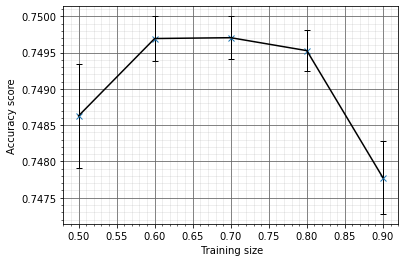

In [47]:
#----- bow, AL, line graph plotting ------
plt.plot(unpickled_al_bow['trainsize'], unpickled_al_bow['accuracy'], 'x')
plt.errorbar(unpickled_al_bow['trainsize'], unpickled_al_bow['accuracy'], yerr = unpickled_al_bow['sem'], markersize=0.5, capsize=3, elinewidth=1, color= 'black' )
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel(' Training size')
plt.ylabel('Accuracy score')

#---- save the figure ----
filepath = 'outputs/NN-AL-BOW-1000ephs_NEW'
plt.savefig(filepath)

In [48]:
# -- Feature extraction: TF-IDF, RL ---
X_t = ml_tools.tf_idf(df['Content'].tolist())[1]
y_t = df['ReasoningLevel'].tolist()

# --- one hot encoding - using labelbinarrizer as it does not require labels to be integers
lb = LabelBinarizer()
lb.fit(y_t)
y_t = lb.transform(y_t)

# --- split the Dataset into test and train
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_t, y_t , train_size = 0.7)

# --- TF-IDF, RL, interation: NN  --- 
accuracies_rlt = []
accuracies_sem_rlt = []
dummy = []
for i in train_sizes:
    X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_t, y_t , train_size = i)
    input = X_train_t.shape[1]
    nn1 = NN(Sequential(), input, 1000, X_train_t, y_train_t, X_test_t, y_test_t)
    dummy.append(nn1.history['accuracy'])

for array in dummy:
    accuracies_rlt.append(np.sum(array)/len(array))
    accuracies_sem_rlt.append(sem(array))

# --- create and save pickled dataframe --- 
dict_rl_tfidf = {'trainsize':train_sizes, 'accuracy':accuracies_rlt, 'sem': accuracies_sem_rlt}
acc_rl_tfidf = pd.DataFrame(dict_rl_tfidf)
utils.save_as_pickle_file(acc_rl_tfidf,'NN_tfidf_rl_trainsize_accuracy_sem_1000ephs', dir_name_e)
unpickled_rl_tfidf = utils.load_pickle_file_to_df('NN_tfidf_rl_trainsize_accuracy_sem_1000ephs',dir_name_e)


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 10)                47160     
                                                                 
 dense_30 (Dense)            (None, 1)                 11        
                                                                 
 flatten_14 (Flatten)        (None, 1)                 0         
                                                                 
Total params: 47,171
Trainable params: 47,171
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
2/2 [==============================] - 2s 165ms/step - loss: 0.7009 - accuracy: 0.2500 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/1000
2/2 [==============================] - 0s 30ms/step - loss: 0.6902 - accuracy: 0.6968 - val_loss: 0.6848 - val_accuracy: 0.7500
Epoch 3/1000
2/2 [============

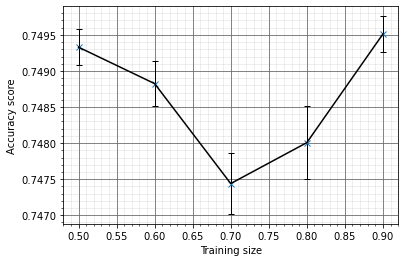

In [49]:
#----- TTF-IDF, RL, graph ------
plt.plot(unpickled_rl_tfidf['trainsize'], unpickled_rl_bow_df['accuracy'], 'x')
plt.errorbar(unpickled_rl_tfidf['trainsize'],unpickled_rl_bow_df['accuracy'], yerr = unpickled_rl_bow_df['sem'], markersize=0.5, capsize=3, elinewidth=1, color= 'black' )
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Training size')
plt.ylabel('Accuracy score')

# --- save the graph
filepath = 'outputs/NN-TFIDF-RL-1000ephs_NEW'
plt.savefig(filepath)

In [50]:
# -- Feature extraction: TF-IDF, AL ---
X_t = ml_tools.tf_idf(df['Content'].tolist())[1]
y_t2= df['ArgumentLevel'].tolist()

# --- one hot encoding - using labelbinarrizer as it does not require labels to be integers
lb = LabelBinarizer()
lb.fit(y_t2)
y_t2 = lb.transform(y_t2)

# --- TF-IDF, AL, interation: NN  ---
accuracies_alt = []
accuracies_sem_alt = []
dummy = []
for i in train_sizes:
    X_train_t2, X_test_t2, y_train_t2, y_test_t2 = train_test_split(X_t, y_t2 , train_size = i)
    input = X_train_t.shape[1]
    nn1 = NN(Sequential(), input, 1000, X_train_t2, y_train_t2, X_test_t2, y_test_t2)
    dummy.append(nn1.history['accuracy'])

for array in dummy:
    accuracies_alt.append(np.sum(array)/len(array))
    accuracies_sem_alt.append(sem(array))

# --- create and save pickled dataframe --- 
dict_al_tfidf = {'trainsize':train_sizes, 'accuracy':accuracies_alt, 'sem': accuracies_sem_alt}
acc_al_tfidf = pd.DataFrame(dict_al_tfidf)
utils.save_as_pickle_file(acc_al_tfidf,'NN_tfidf_al_trainsize_accuracy_sem_1000ephs', dir_name_e)
unpickled_al_tfidf = utils.load_pickle_file_to_df('NN_tfidf_al_trainsize_accuracy_sem_1000ephs',dir_name_e)


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 10)                47160     
                                                                 
 dense_40 (Dense)            (None, 1)                 11        
                                                                 
 flatten_19 (Flatten)        (None, 1)                 0         
                                                                 
Total params: 47,171
Trainable params: 47,171
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
2/2 [==============================] - 1s 233ms/step - loss: 0.6838 - accuracy: 0.8000 - val_loss: 0.6780 - val_accuracy: 0.8000
Epoch 2/1000
2/2 [==============================] - 0s 34ms/step - loss: 0.6757 - accuracy: 0.8000 - val_loss: 0.6692 - val_accuracy: 0.8000
Epoch 3/1000
2/2 [============

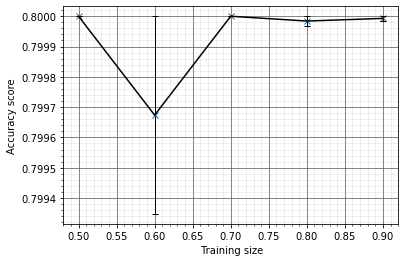

In [52]:
#----- tfidf, AL, graph, plotting  ------
plt.plot(unpickled_al_tfidf['trainsize'], unpickled_al_tfidf['accuracy'], 'x')
plt.errorbar(unpickled_al_tfidf['trainsize'], unpickled_al_tfidf['accuracy'], yerr = unpickled_al_tfidf['sem'], markersize=0.5, capsize=3, elinewidth=1, color= 'black' )
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel(' Training size')
plt.ylabel('Accuracy score')


# --- save graphs 
filepath = 'outputs/NN-TFIDF-AL-1000ephs_NEW'
plt.savefig(filepath)

No handles with labels found to put in legend.


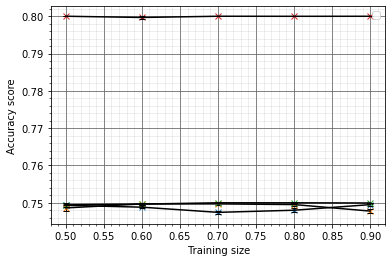

In [53]:
# --- All graphs on one plot
plt.plot(train_sizes, accuracies, 'x')
plt.errorbar(train_sizes, accuracies, yerr = accuracies_sem, markersize=0.5, capsize=3, elinewidth=1, color = 'black')
plt.plot(train_sizes, accuracies_al, 'x')
plt.errorbar(train_sizes, accuracies_al, yerr = accuracies_sem_al, markersize=0.5, capsize=3, elinewidth=1, color= 'black' )
plt.plot(train_sizes, accuracies_rlt, 'x')
plt.errorbar(train_sizes, accuracies_rlt, yerr = accuracies_sem_rlt, markersize=0.5, capsize=3, elinewidth=1, color= 'black' )
plt.plot(train_sizes, accuracies_alt, 'x')
plt.errorbar(train_sizes, accuracies_alt, yerr = accuracies_sem_alt, markersize=0.5, capsize=3, elinewidth=1, color= 'black' )
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel(' Training size')
plt.ylabel('Accuracy score')
#plt.title('TF-IDF - RL - NN - 1000 epochs')
plt.legend()
#filepath = 'outputs/NN-tfidf-AL-1000 epoch'
#plt.savefig(filepath)